In [176]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

Collect all results

In [177]:
# aggregated
comb_idx_agg_df = pd.read_csv("aggregated/comp_index_result.csv")
intersect_agg_df = pd.read_csv("aggregated/intersect_result.csv")
no_idx_agg_df = pd.read_csv("aggregated/no_index_result.csv")
x_idx_agg_df = pd.read_csv("aggregated/x_index_result.csv")
y_idx_agg_df = pd.read_csv("aggregated/y_index_result.csv")

agg_dfs_list = [comb_idx_agg_df, intersect_agg_df, no_idx_agg_df, x_idx_agg_df, y_idx_agg_df]
agg_labels_list = ["comb_idx_agg_df", "intersect_agg_df", "no_idx_agg_df", "x_idx_agg_df", "y_idx_agg_df"]

# individual
comb_idx_df = pd.read_csv("individual/comp_index_result.csv")
intersect_df = pd.read_csv("individual/intersect_result.csv")
no_idx_df = pd.read_csv("individual/no_index_result.csv")
x_idx_df = pd.read_csv("individual/x_index_result.csv")
y_idx_df = pd.read_csv("individual/y_index_result.csv")

dfs_list = [comb_idx_df, intersect_df, no_idx_df, x_idx_df, y_idx_df]
labels_list = ["comb_idx_df", "intersect_df", "no_idx_df", "x_idx_df", "y_idx_df"]

Look at some data frame

In [178]:
comb_idx_agg_df.head(5)

,x_min,x_max,y_min,y_max,repeat,row_count_total,row_count_avg,execution_time_total_ms,execution_time_avg_ms
0,1047107,1047147,5592896,5592926,20,0,0,3.259,0.163
1,906961,907041,5682350,5682410,20,0,0,5.268,0.263
2,895489,895609,5671974,5672064,20,0,0,4.939,0.247
3,948553,948713,5446881,5447001,20,0,0,6.807,0.340
4,918843,919043,5571270,5571420,20,0,0,5.920,0.296


In [179]:
comb_idx_df.tail(5)

,x_min,x_max,y_min,y_max,records_count,execution_time_ms
435,879220,1679220,5442513,6042513,965904,1923.292
436,879220,1679220,5442513,6042513,965904,1901.041
437,879220,1679220,5442513,6042513,965904,1788.771
438,879220,1679220,5442513,6042513,965904,2237.014
439,879220,1679220,5442513,6042513,965904,2097.673


start from visualizing dependency of variables and its comparing.
define some helper functions:

In [ ]:
def plot_graph(x: pd.Series, y: pd.Series, title: str = None, 
                xlabel: str = "x", ylabel: str = "y", 
                figsize: tuple = (8, 5), save_path: str = None):
    plt.figure(figsize=figsize)

    plt.plot(x, y, color='b', linewidth=1.2)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title if title else f"{ylabel} vs {xlabel}")
    plt.grid(True)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    plt.close()

def compare_data(data_list: list[pd.DataFrame], x: str, y: str, title: str = "Comparison Plot",
                 labels: list[str] = None, xlabel: str = None, ylabel: str = None,
                 threshold: float = None, below: bool = True,
                 figsize: tuple = (8, 5), save_path: str = None):
    plt.figure(figsize=figsize)

    for i, df in enumerate(data_list):
        label = labels[i] if labels and i < len(labels) else f"Dataset {i+1}"

        filtered_df = df
        if threshold is not None:
            if below:
                filtered_df = df[df[x] <= threshold]
            else:
                filtered_df = df[df[x] > threshold]

        plt.plot(filtered_df[x], filtered_df[y], label=label, linewidth=1.2)

    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.title(f"{title} ({x} {'≤' if below else '>'} {threshold})" if threshold is not None else title)
    plt.grid(True)
    plt.legend()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [181]:
def plot_subplots(data_list: list[pd.DataFrame], x: str, y: str, titles: list[str] = None,
                 figsize: tuple = (15, 10), save_path: str = None):
    n_plots = len(data_list)
    
    cols = int(n_plots**0.5) + (1 if n_plots**0.5 % 1 > 0 else 0)
    rows = (n_plots + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows * cols > 1 else [axes]
    
    for i, df in enumerate(data_list):
        ax = axes[i]
        ax.plot(df[x], df[y], color='b', linewidth=1.2)

        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_title(titles[i] if titles and i < len(titles) else f"Plot {i+1}")
        ax.grid(True)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

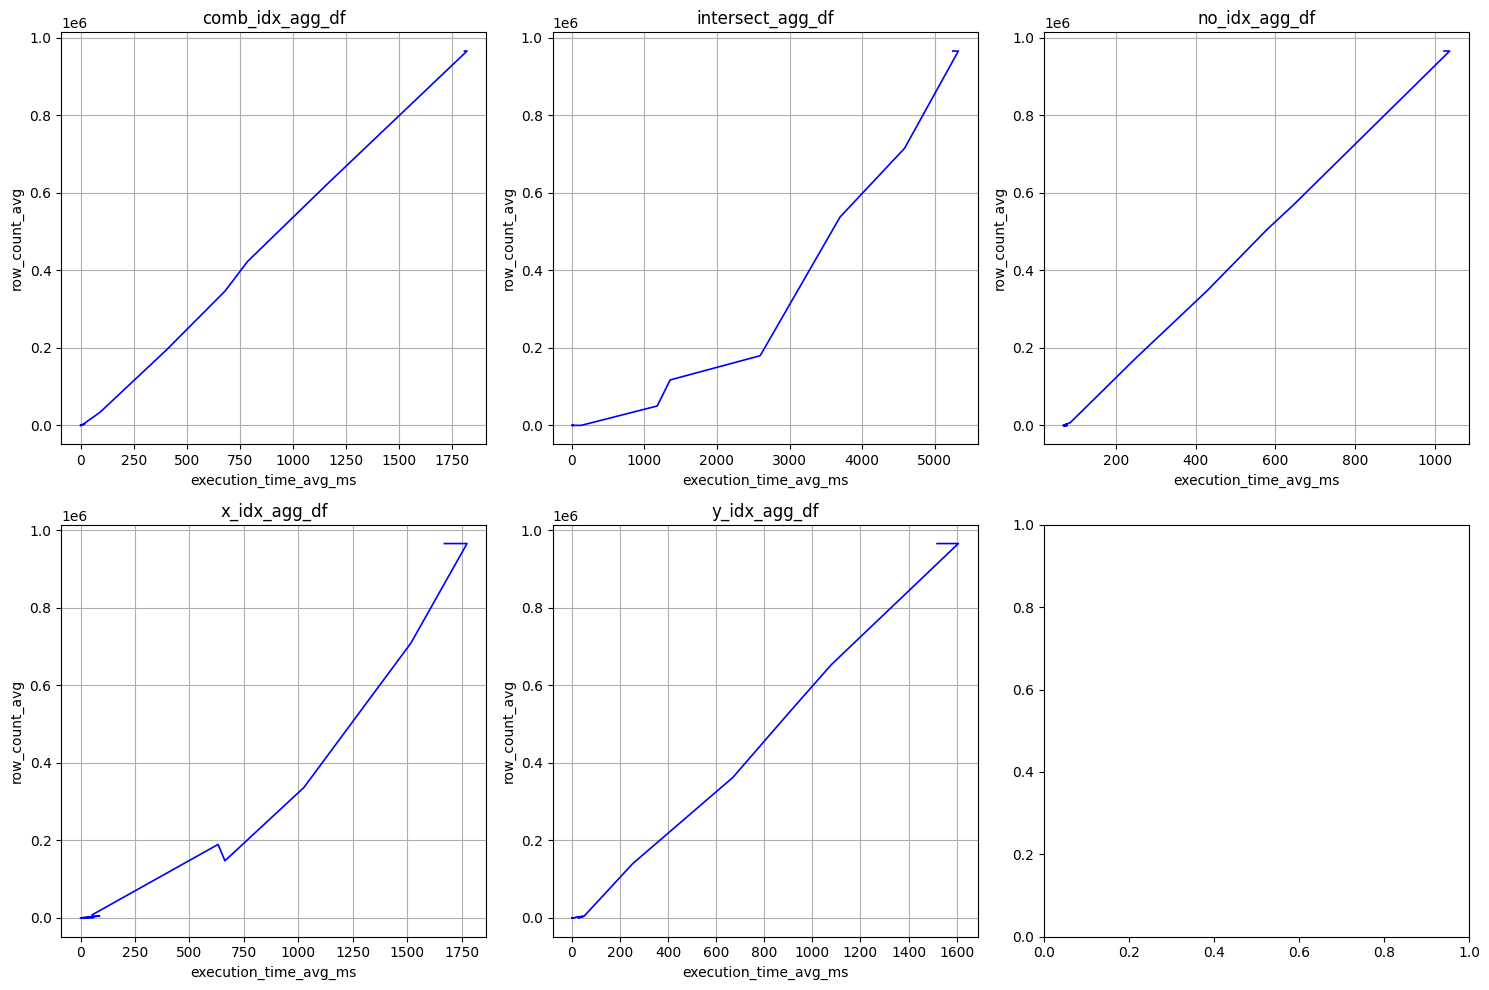

In [182]:
plot_subplots(agg_dfs_list, 
              titles=agg_labels_list,
              x="execution_time_avg_ms", y="row_count_avg")

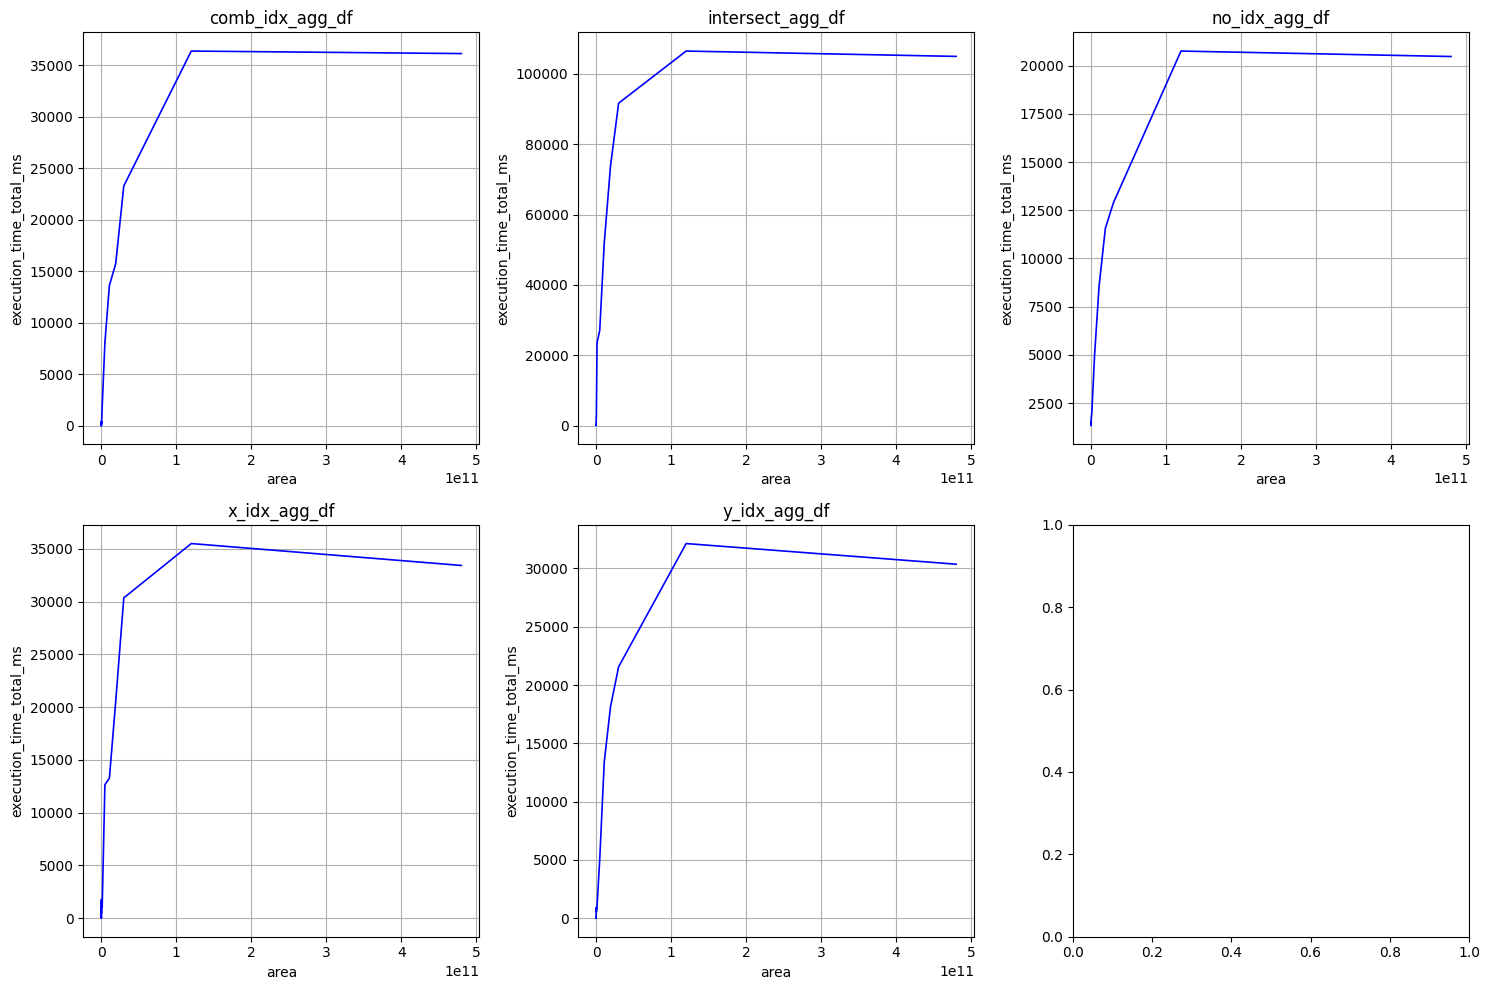

In [183]:
for df in agg_dfs_list:
    df["area"] = (df["x_max"] - df["x_min"]) * (df["y_max"] - df["y_min"])

plot_subplots(agg_dfs_list, 
              titles=agg_labels_list,
              x="area", y="execution_time_total_ms")

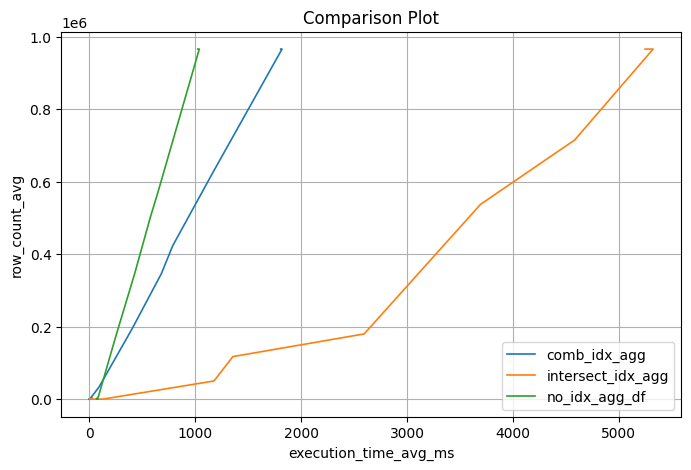

In [184]:
compare_data(data_list=[comb_idx_agg_df, intersect_agg_df, no_idx_agg_df], labels=["comb_idx_agg", "intersect_idx_agg", "no_idx_agg_df"], x="execution_time_avg_ms", y="row_count_avg")

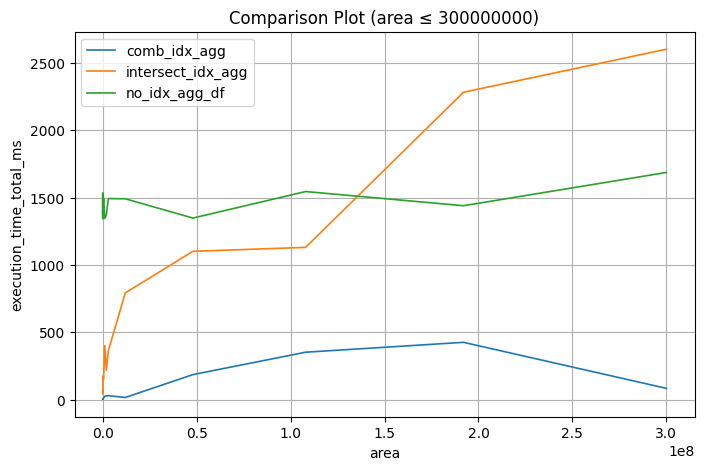

In [185]:
compare_data(data_list=[comb_idx_agg_df, intersect_agg_df, no_idx_agg_df], 
             labels=["comb_idx_agg", "intersect_idx_agg", "no_idx_agg_df"], 
             x="area", y="execution_time_total_ms",
             threshold=300_000_000, below=True)

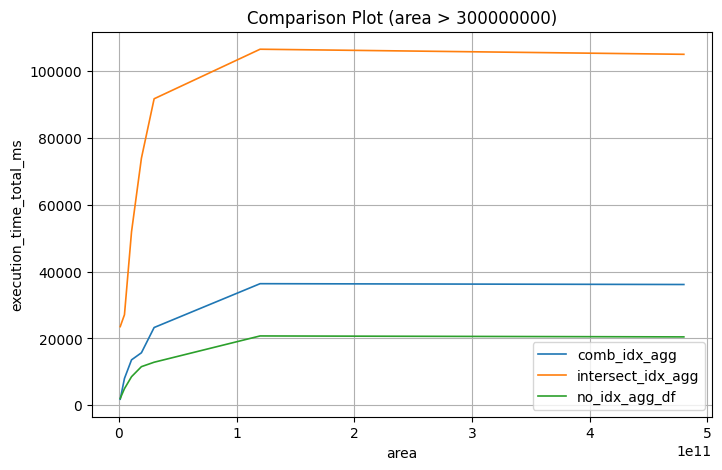

In [186]:
compare_data(data_list=[comb_idx_agg_df, intersect_agg_df, no_idx_agg_df], 
             labels=["comb_idx_agg", "intersect_idx_agg", "no_idx_agg_df"], 
             x="area", y="execution_time_total_ms",
             threshold=300_000_000, below=False)

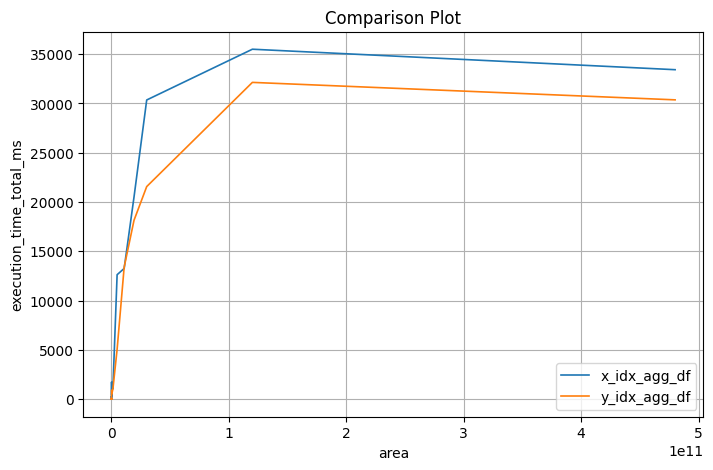

In [187]:
compare_data(data_list=[x_idx_agg_df, y_idx_agg_df], labels=["x_idx_agg_df", "y_idx_agg_df"], y="execution_time_total_ms", x="area")

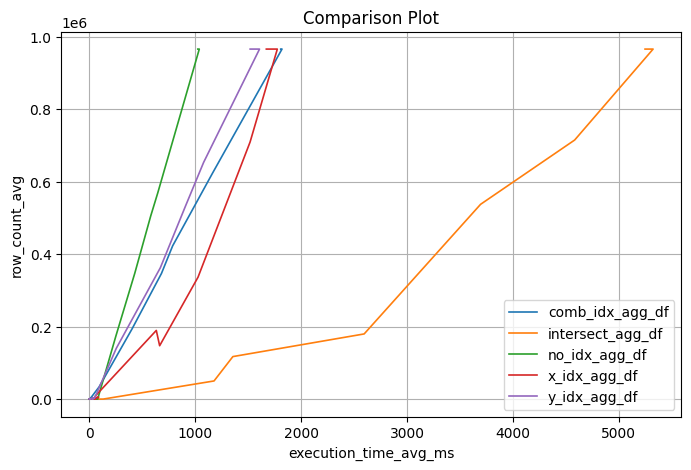

In [188]:
compare_data(data_list=agg_dfs_list, labels=agg_labels_list, x="execution_time_avg_ms", y="row_count_avg")

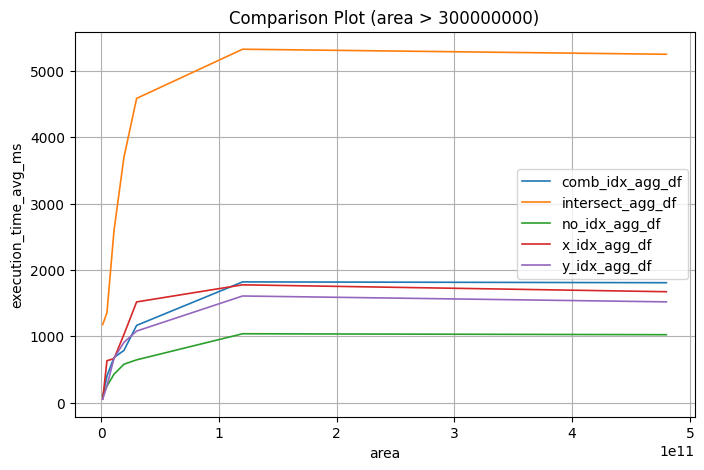

In [189]:
compare_data(data_list=agg_dfs_list, labels=agg_labels_list, 
             y="execution_time_avg_ms", x="area",
             threshold=300_000_000, below=False)

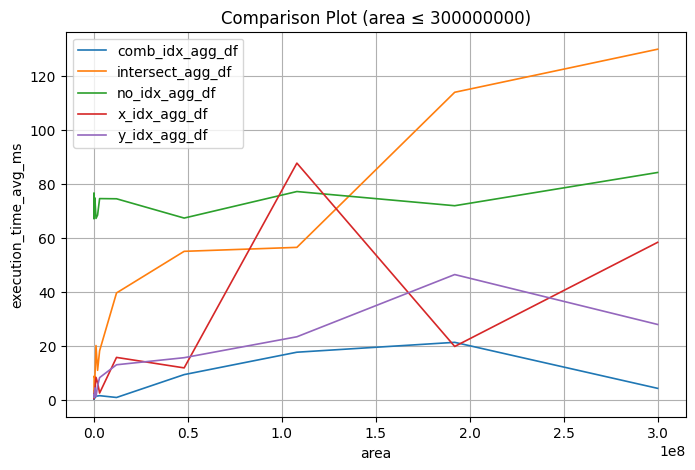

In [190]:
compare_data(data_list=agg_dfs_list, labels=agg_labels_list, 
             y="execution_time_avg_ms", x="area",
             threshold=300_000_000, below=True)

In [191]:
def plot_comparison_bar(data_list: list[pd.DataFrame], labels: list[str], 
                        metric_col: str, group_col: str, threshold: float = None, below: bool = True,
                        figsize: tuple = (12, 6), save_path: str = None):
    comparison_data = {}

    for i, df in enumerate(data_list):
        grouped = df.groupby(group_col)[metric_col].mean()

        if threshold is not None:
            if below:
                grouped = grouped[grouped.index <= threshold]
            else:
                grouped = grouped[grouped.index > threshold]

        comparison_data[labels[i]] = grouped

    comparison_df = pd.DataFrame(comparison_data).fillna(0)

    plt.figure(figsize=figsize)
    comparison_df.plot(kind='bar', ax=plt.gca(), width=0.8)

    plt.xlabel(group_col.title())
    plt.ylabel(metric_col.title())
    plt.title(f'Comparison of {metric_col} by {group_col} ({"<=" if below else ">"} {threshold})' if threshold is not None 
              else f'Comparison of {metric_col} by {group_col}')
    plt.legend(title='Datasets', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    plt.close()


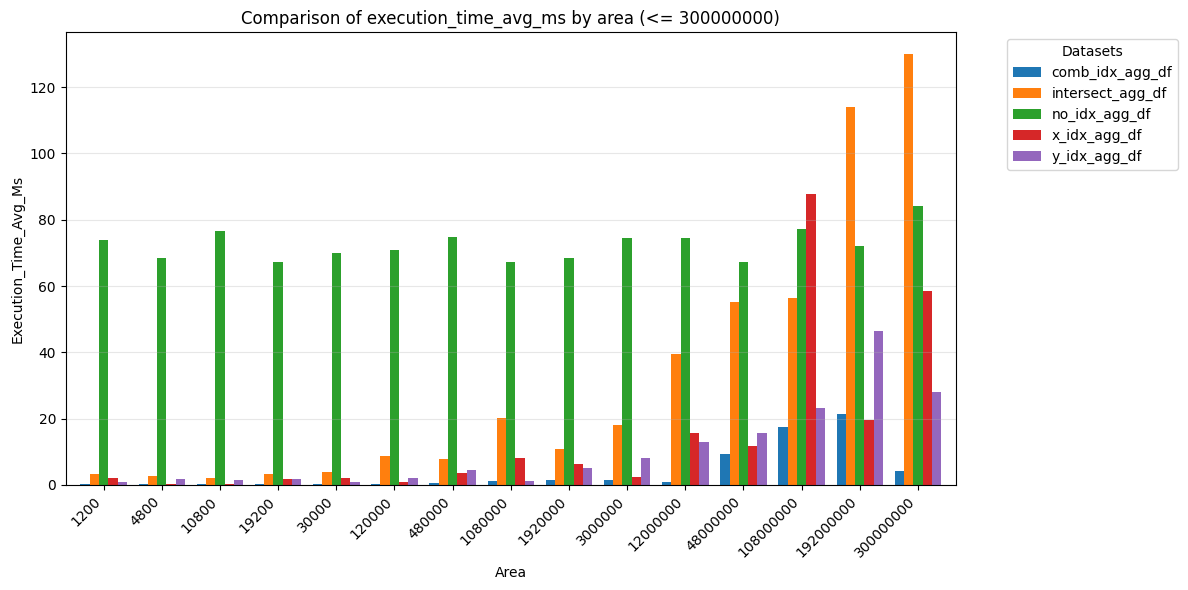

In [192]:
plot_comparison_bar(data_list=agg_dfs_list, labels=agg_labels_list, metric_col="execution_time_avg_ms", group_col="area", 
                    threshold=300_000_000, below=True)

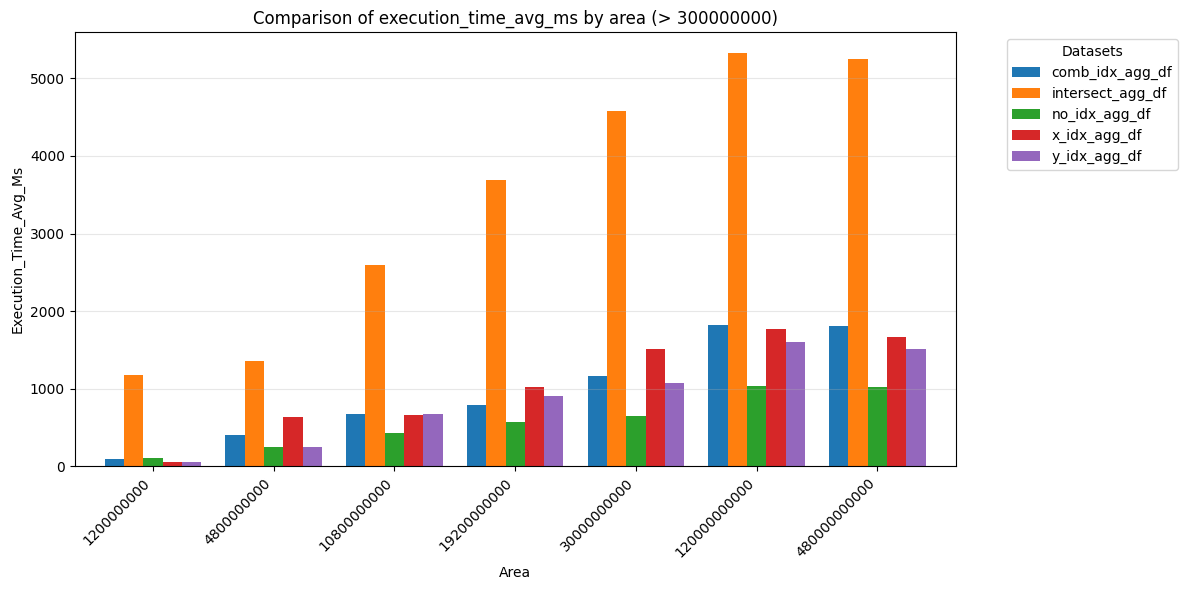

In [193]:
plot_comparison_bar(data_list=agg_dfs_list, labels=agg_labels_list, metric_col="execution_time_avg_ms", group_col="area", 
                    threshold=300_000_000, below=False)

look at the data distribution.
define some helper functions:

In [ ]:
def get_default_bin_count(data):
    if data.empty:
        return 1
    n = len(data)
    if n <= 100:
        bins = int(n ** 0.5)
    else:
        bins = int(n ** (1 / 3))
    return max(bins, 1)

def plot_hist(x: pd.Series, bins: int = None, xlabel: str = "x",
             figsize: tuple = (8, 5), save_path: str = None):
    plt.figure(figsize=figsize)

    bins = get_default_bin_count(x) if not bins else bins
    plt.hist(x, bins=bins, color='b', alpha=0.7, edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.title(f"Distribution of {xlabel}")
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

def plot_box(x: pd.Series, xlabel: str = "x", figsize: tuple = (8, 5), save_path: str = None):
    plt.figure(figsize=figsize)
    
    bp = plt.boxplot(x, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')

    plt.ylabel(xlabel)
    plt.title(f"Distribution of {xlabel}")
    plt.grid(True, alpha=0.3)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

In [ ]:
def plot_hist_subplots(data_list: list[pd.DataFrame], value_col: str, titles: list[str] = None,
                       bins: int = None, figsize: tuple = (15, 10), save_path: str = None):
    n_plots = len(data_list)
    
    cols = int(n_plots**0.5) + (1 if n_plots**0.5 % 1 > 0 else 0)
    rows = (n_plots + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows * cols > 1 else [axes]
    
    for i, df in enumerate(data_list):
        ax = axes[i]
        x = df[value_col].dropna()
        cur_bins = bins if bins else get_default_bin_count(x)

        ax.hist(x, bins=cur_bins, color='skyblue', edgecolor='black', alpha=0.75)
        ax.set_title(titles[i] if titles and i < len(titles) else f"Plot {i+1}")
        ax.set_xlabel(value_col)
        ax.set_ylabel("Count")
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

In [202]:
def plot_box_subplots(data_list: list[pd.DataFrame], value_col: str, titles: list[str] = None,
                      figsize: tuple = (15, 10), save_path: str = None):
    n_plots = len(data_list)

    cols = int(n_plots ** 0.5) + (1 if n_plots ** 0.5 % 1 > 0 else 0)
    rows = (n_plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows * cols > 1 else [axes]

    for i, df in enumerate(data_list):
        ax = axes[i]
        x = df[value_col].dropna()

        bp = ax.boxplot(x, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')

        ax.set_title(titles[i] if titles and i < len(titles) else f"Plot {i+1}")
        ax.set_ylabel(value_col)
        ax.grid(True, alpha=0.3)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    plt.close()

In [199]:
x_idx_df

,x_min,x_max,y_min,y_max,records_count,execution_time_ms
0,999432,999472,5461672,5461702,0,295.146
1,999432,999472,5461672,5461702,0,0.915
2,999432,999472,5461672,5461702,0,0.852
3,999432,999472,5461672,5461702,0,0.849
4,999432,999472,5461672,5461702,0,0.834
...,...,...,...,...,...,...
435,879220,1679220,5442513,6042513,965904,1718.937
436,879220,1679220,5442513,6042513,965904,1693.606
437,879220,1679220,5442513,6042513,965904,1691.205
438,879220,1679220,5442513,6042513,965904,1653.906


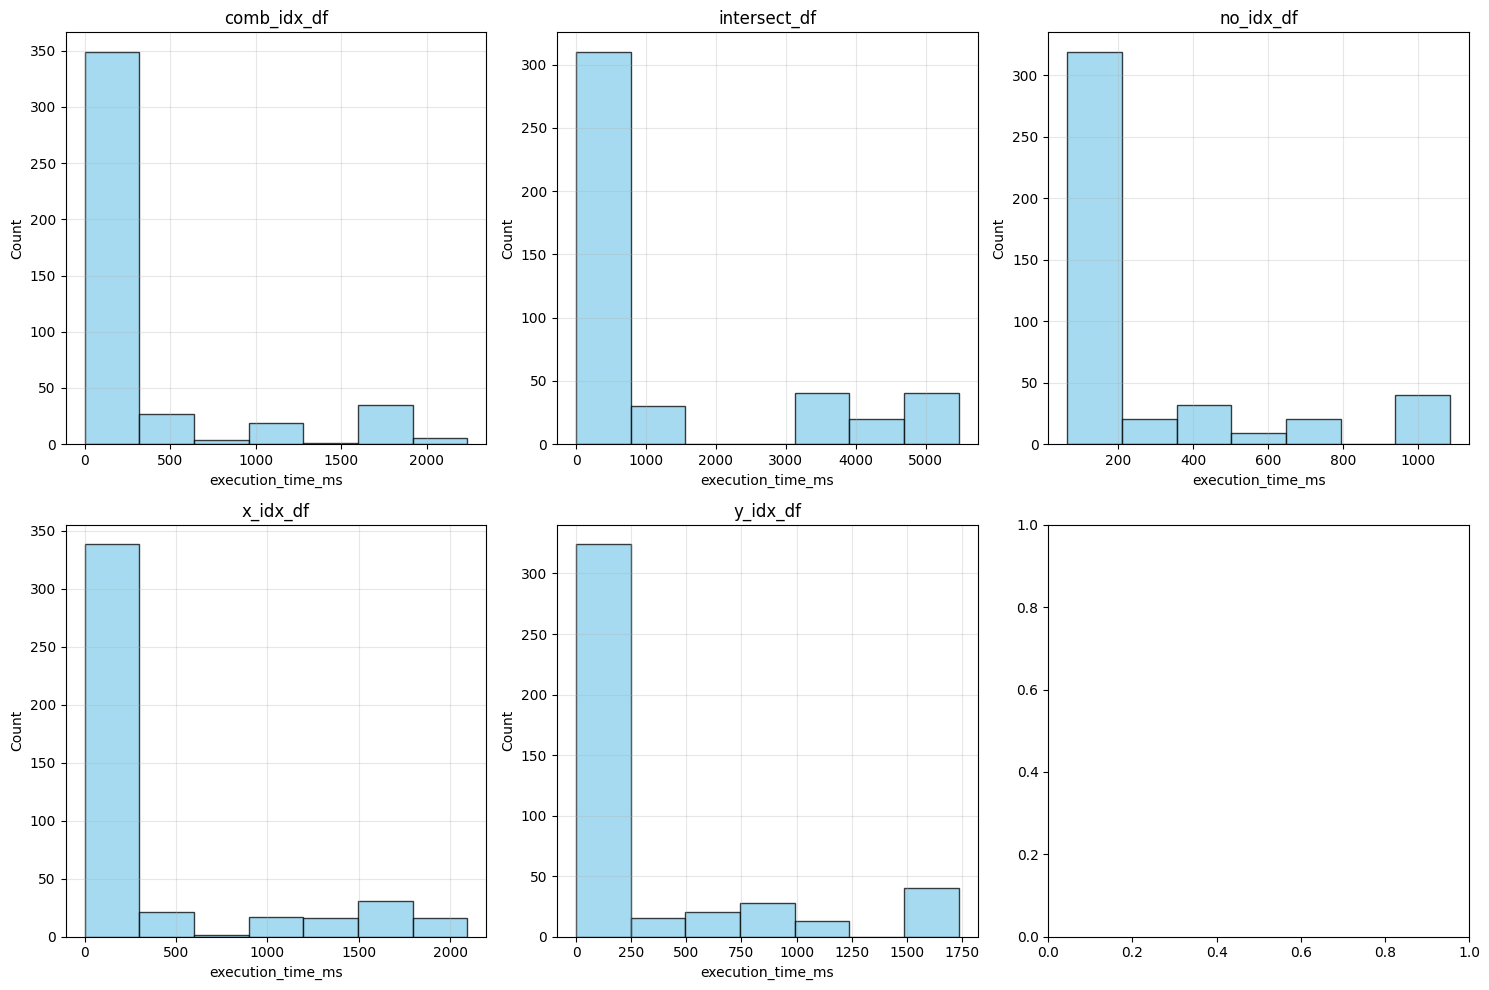

In [200]:
plot_hist_subplots(dfs_list, value_col='execution_time_ms', 
                   titles=labels_list)

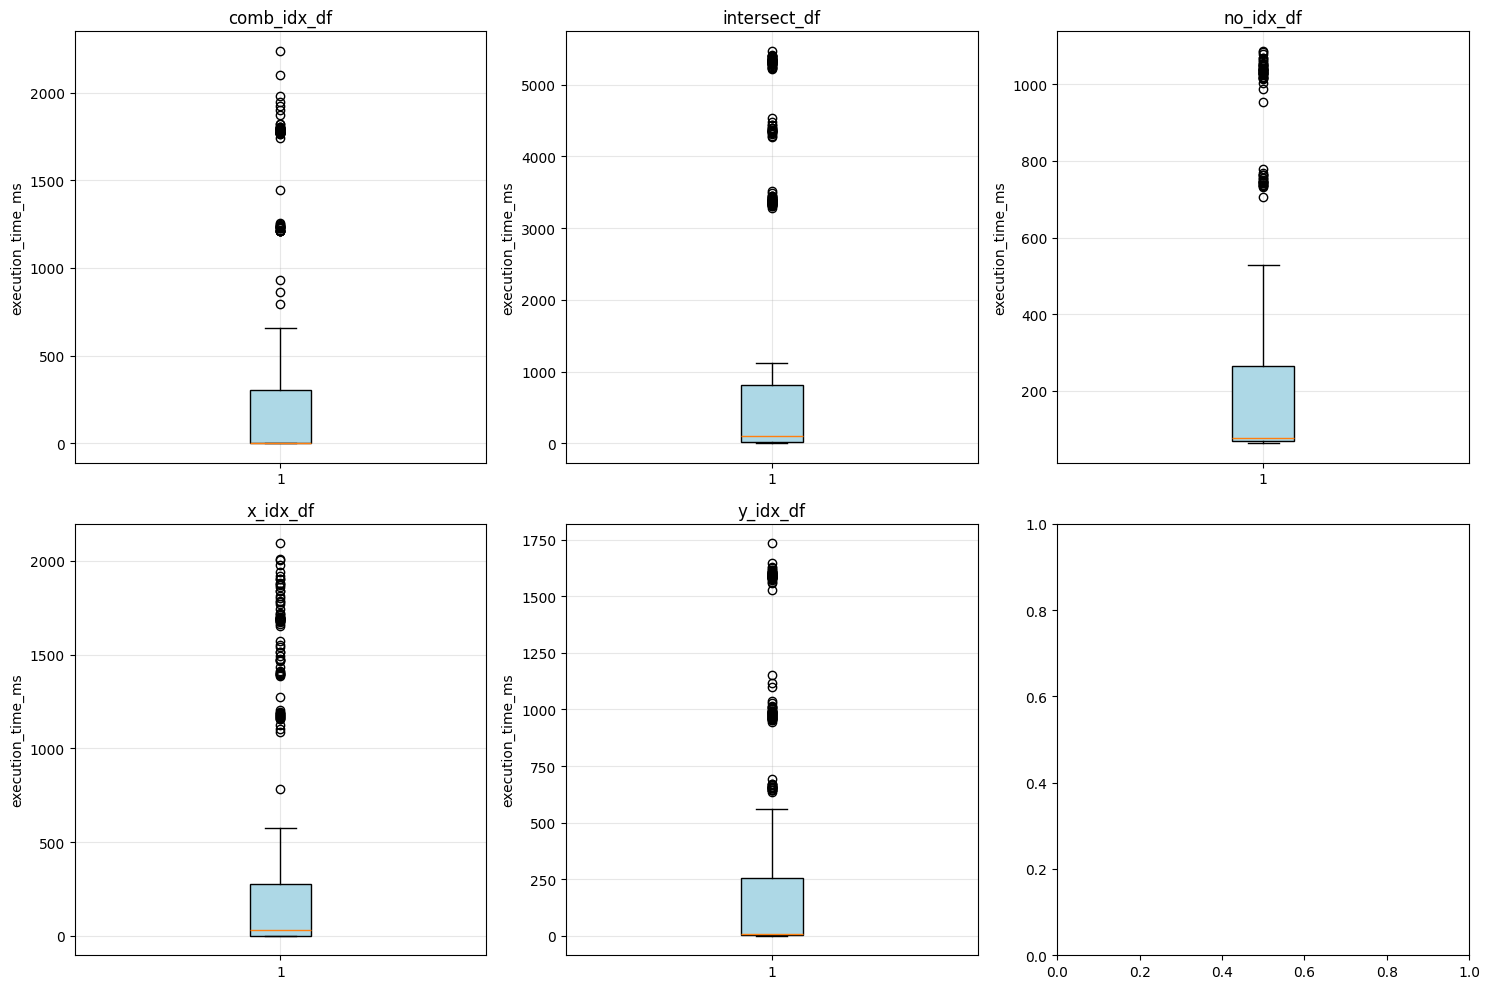

In [203]:
plot_box_subplots(dfs_list, value_col='execution_time_ms', 
                   titles=labels_list)